## Simple Chatbot

In [20]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    # Schema
    messages: Annotated[list[BaseMessage],add_messages]

In [11]:
llm = ChatGroq(model ="deepseek-r1-distill-llama-70b")

def chat_node(state:ChatState):
    # take user query
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response from llm to store in state
    return {"messages":[response]}

In [21]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

# add node
graph.add_node("chat_node",chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)


chatbot = graph.compile(checkpointer=checkpointer)


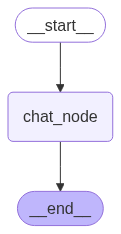

In [22]:
chatbot

In [17]:
initial_state = {
    "messages": [HumanMessage(content="What is capital of India")]
}

chatbot.invoke(initial_state)['messages'][-1].content

"<think>\nOkay, so I need to figure out what the capital of India is. Hmm, I'm not entirely sure, but I think it's one of the major cities there. Let me start by recalling what I know about India. I know it's a big country in South Asia with a rich history and diverse cultures. I've heard of cities like Mumbai, Delhi, Bangalore, and Kolkata. \n\nWait, Mumbai is a financial hub, right? So maybe that's not the capital. Bangalore is known for its tech industry, so probably not the capital either. Kolkata is more on the eastern side, I think. That leaves Delhi. I've heard Delhi being mentioned in the context of government and politics. \n\nBut I'm not 100% sure. Maybe I should think about other clues. I remember learning that some countries have their capitals not in the largest city. For example, in the US, the capital is Washington D.C., not New York or Los Angeles. So maybe India's capital isn't its largest city. \n\nI think Mumbai is the most populous city in India, but I'm not certain

In [19]:
while True:

    user_message = input("Type here: ")

    print("USER: ",user_message)
    if user_message.strip().lower() in ['exit','bye','quit']:
        break

    response =chatbot.invoke({"messages":[HumanMessage(content=user_message)]})
    print("AI: ",response['messages'][-1].content)


USER:  hi my name is anuj
AI:  <think>

</think>

Hi Anuj! How can I assist you today? 😊
USER:  can u tell me my name?
AI:  <think>

</think>

I can't access personal information like your name. If you'd like, you can share it with me, and I'll do my best to assist you! 😊
USER:  add 10 to 1000
AI:  <think>

</think>

Sure! 10 added to 1000 is:

10 + 1000 = **1010**
USER:  now add another 10
AI:  <think>
I need to add 10 to the current number. Since the starting number isn't provided, I'll represent it with a variable, such as \( n \).

First, I'll take the current number, which is \( n \).

Next, I'll add 10 to \( n \) to find the sum.

Therefore, the result of adding 10 is \( n + 10 \).
</think>

**Solution:**

To add another 10 to a number, follow these easy steps:

1. **Start with the current number:**  
   Let's assume the current number is \( n \).

2. **Add 10 to the current number:**  
   \[
   n + 10
   \]

3. **Final Answer:**  
   The result of adding 10 is:
   \[
   \boxed{n

In [26]:
# Adding Persistent Memory
thread_id = '1'

while True:

    user_message = input("Type here: ")

    print("USER: ",user_message)
    if user_message.strip().lower() in ['exit','bye','quit']:
        break
    
    config = {'configurable':{"thread_id":thread_id}}
    response =chatbot.invoke({"messages":[HumanMessage(content=user_message)]},config=config)
    print("AI: ",response['messages'][-1].content)


USER:  what is my name
AI:  <think>

Your name is **Anuj**! 😊 How can I assist you today?
USER:  you can be my assistant today help mex
AI:  <think>
Alright, let me try to figure out what the user is asking for here. So, looking back at the conversation history, the user's name is Anuj. They've asked a few questions so far: their name, simple math problems, and converting hours to seconds. 

Now, in their latest message, they wrote, "you can be my assistant today help mex." I think there might be a typo there. It probably should be "help me" instead of "help mex." So, they're asking if I can be their assistant today and help them with something.

Since I've already been assisting them with their previous questions, it seems like they're confirming if I can continue helping them. They might have more questions or need further assistance. 

I should respond positively, reassure them that I'm here to help, and maybe ask how I can assist them today. Keeping the tone friendly and approachab

In [27]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi my name is Anuj', additional_kwargs={}, response_metadata={}, id='eabdb21c-9df5-4b7a-b8ff-50737e3276a4'), AIMessage(content='<think>\n\n</think>\n\nHi Anuj! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 9, 'total_tokens': 27, 'completion_time': 0.09788769, 'prompt_time': 0.000203656, 'queue_time': 0.057746464, 'total_time': 0.098091346}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--82585cb0-0a5b-4a3d-a209-0804c3bbee44-0', usage_metadata={'input_tokens': 9, 'output_tokens': 18, 'total_tokens': 27}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='9633703b-8d8c-46ec-91e2-fff2af030413'), AIMessage(content='<think>\nAlright, the user just asked, "what is my name." Looking back at the con